In [2]:
import pandas as pd

import matplotlib.pyplot as plt

### Run it to read the CSV file into a DataFrame

In [3]:
df = pd.read_csv("technologies.csv")
df.head()

,name,technologies,posted_date,company
0,Python-програміст,"CSS,HTML,JavaScript,Python,PostgreSQL,Flask,Ce...",2024-05-01,"Дервішов І.Г., ФОП"
1,Python-програміст,"Python,MongoDB,FastAPI,OpenAI",2024-04-29,Vilmate LLC
2,Python-програміст,"Java,PHP,MySQL,Git,GitHub,GitLab,JavaScript,Py...",2024-04-29,PNN Soft
3,Викладач програмування,"JavaScript,Java,Python,Програмування",2024-04-29,"Hammer Gym, мережа фітнес-центрів"
4,Python-програміст,"Python,Responsibility,Machine learning,Deep Le...",2024-04-27,Logivations


### This code performs the following steps:

1. Splitting the technologies listed in the "technologies" column into separate entries and converting them into a list of lists.

2. Creating a new column called "all_technologies" containing a list of technologies for each record.

3. Exploding the list of technologies in the new "all_technologies" column, i.e., converting each list of technologies into separate rows.

4. Creating a new DataFrame based on the cross-tabulation, which counts the occurrences of each technology and joining it with the original DataFrame.

5. Dropping the "all_technologies" and "technologies" columns as they are no longer needed.

6. Converting the "posted_date" column to datetime format.

7. Displaying the first few rows of the DataFrame.

In [4]:
technologies = df["technologies"].str.split(",").values.tolist()

df["all_technologies"] = technologies

all_technologies = df["all_technologies"].explode()

df = df.join(
   pd.crosstab(
       all_technologies.index, all_technologies
   )
)

df = df.drop(columns=["all_technologies", "technologies"])

df["posted_date"] = pd.to_datetime(df["posted_date"])

df.head()

,name,posted_date,company,AWS,Agile,Aiohttp,Backend-розробка,Beautiful Soup,C#,C++,...,Пунктуальність,Робота в команді,Робота з базою даних,Розробка API,Саморозвиток,Стресостійкість,Уважність,Цілеспрямованість,впевненість щодо викладання,практичне програмування
0,Python-програміст,2024-05-01,"Дервішов І.Г., ФОП",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Python-програміст,2024-04-29,Vilmate LLC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Python-програміст,2024-04-29,PNN Soft,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Викладач програмування,2024-04-29,"Hammer Gym, мережа фітнес-центрів",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Python-програміст,2024-04-27,Logivations,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### This code generates a bar chart displaying the 30 most popular technologies based on the frequency of occurrence in the dataset.

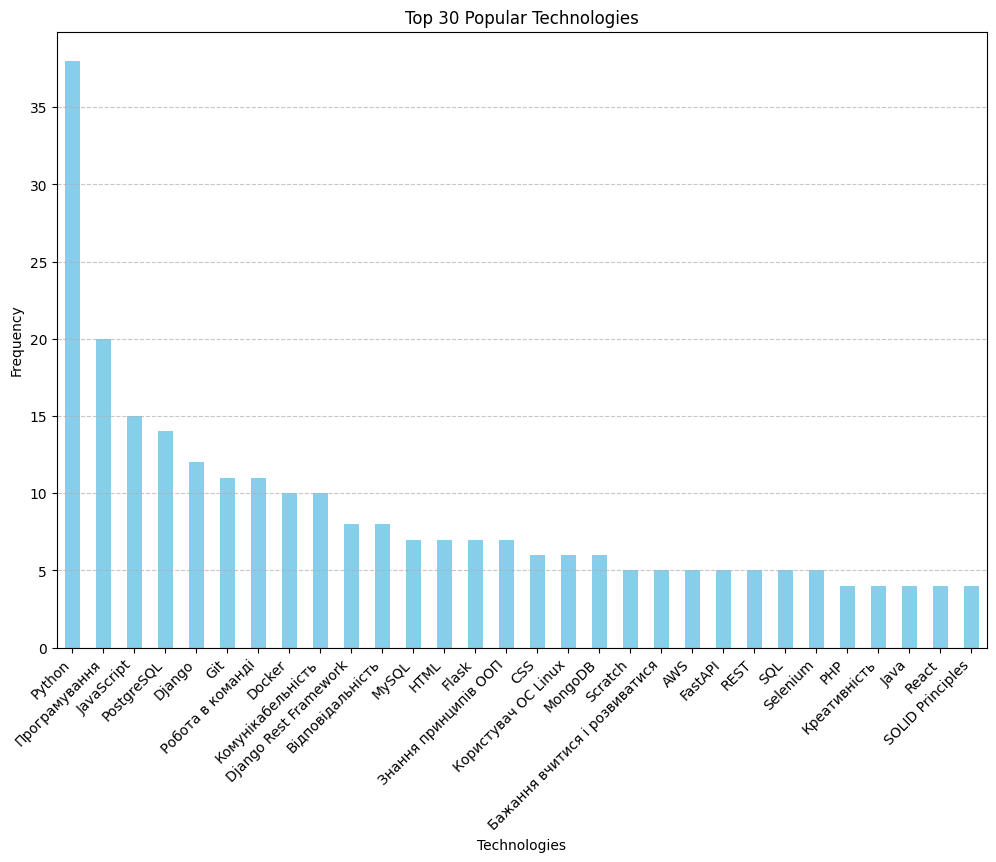

In [5]:
df_only_tech = df.drop(columns=["name", "posted_date", "company"])
top_technologies = df_only_tech.sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 8))
top_technologies.plot(kind="bar", color="skyblue")
plt.title("Top 30 Popular Technologies")
plt.xlabel("Technologies")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### This code creates a pie chart showing the top 25 most popular technologies, with added title, customized colors, and removed axis labels.

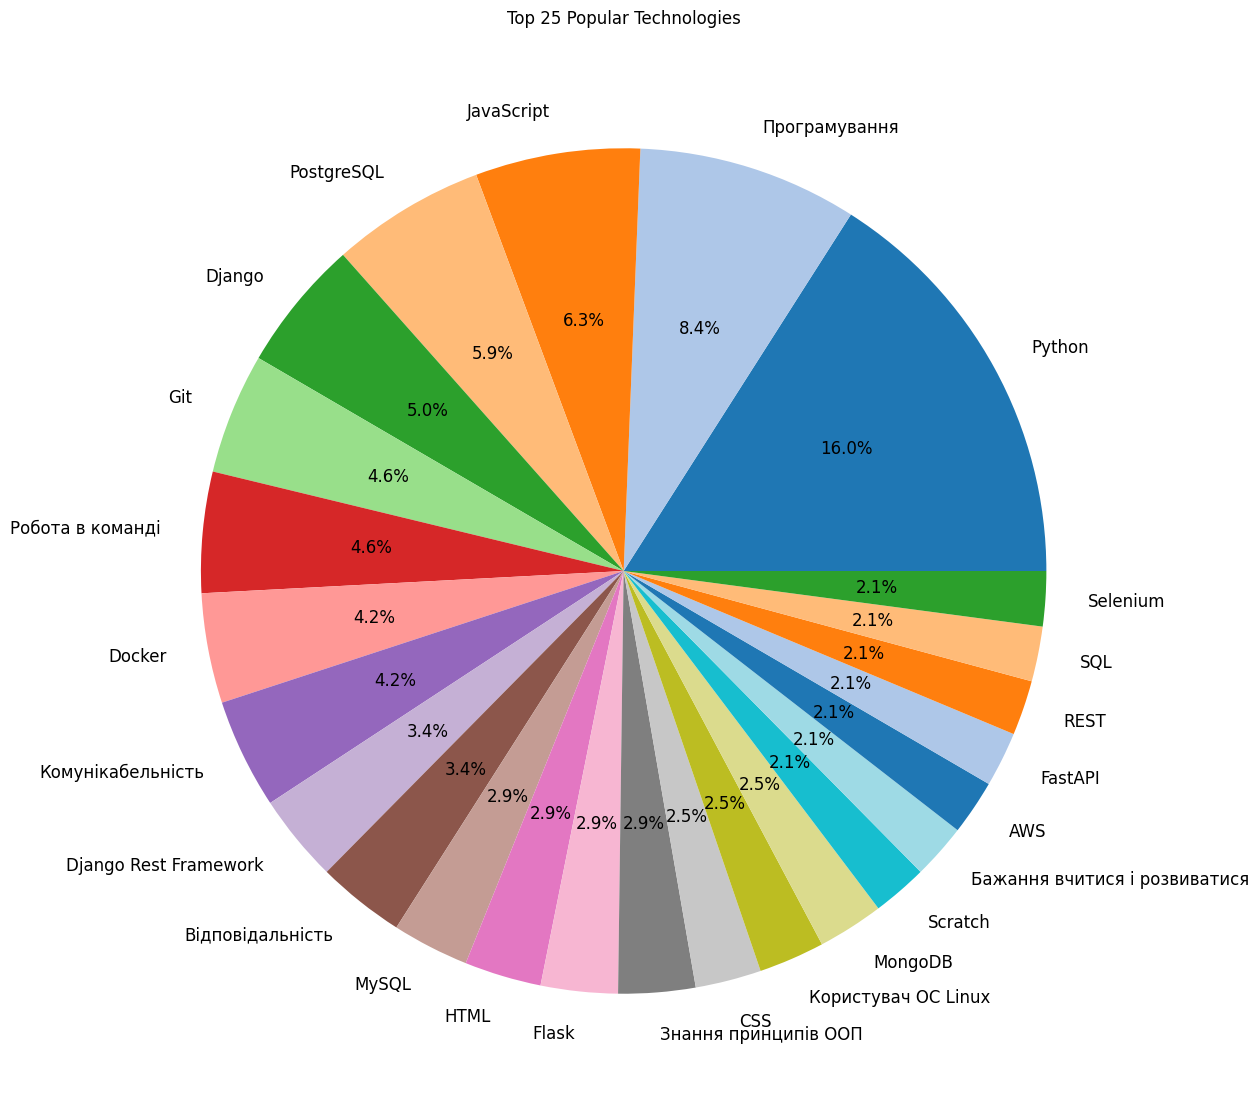

In [9]:
df_only_tech = df.drop(columns=["name", "posted_date", "company"])
df_only_tech = df_only_tech.apply(pd.to_numeric)

top_technologies = df_only_tech.sum().sort_values(ascending=False).head(25)

plt.figure(figsize=(12, 14))
top_technologies.plot(kind="pie", autopct="%1.1f%%", fontsize=12, colors=plt.cm.tab20.colors)
plt.title("Top 25 Popular Technologies")
plt.ylabel("")
plt.axis("equal")
plt.show()

### This code creates a horizontal bar chart showing the top 10 most popular vacancies, with added title, axis labels, and rotated X-axis labels

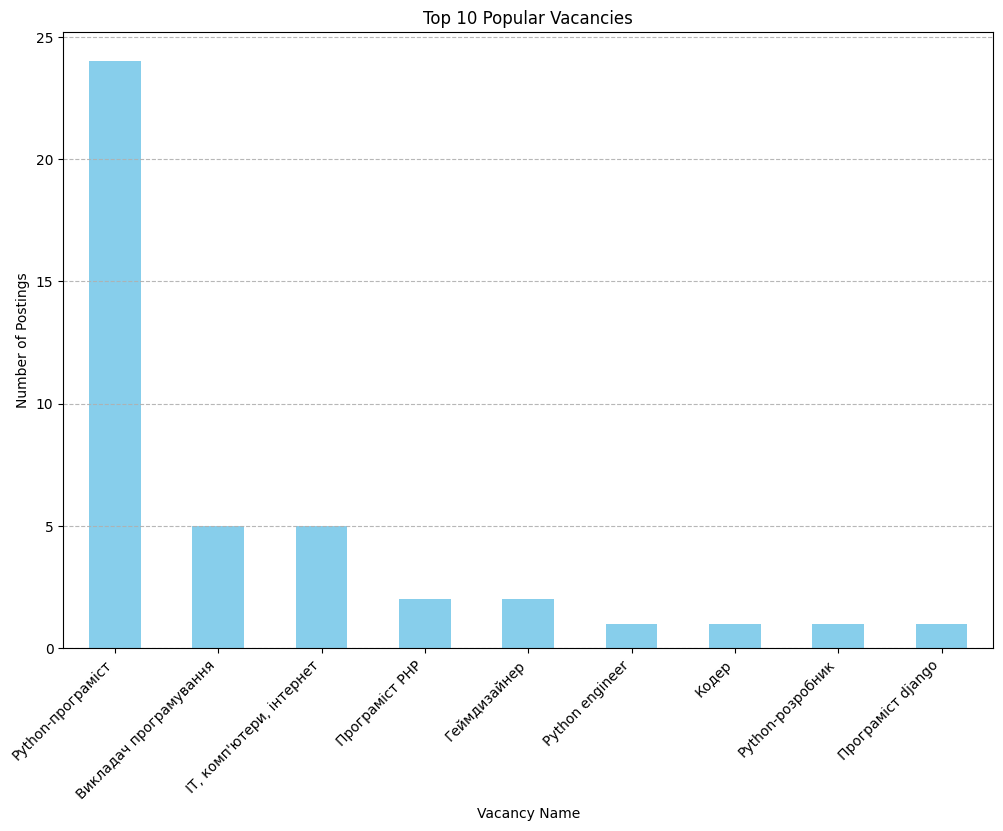

In [7]:
plt.figure(figsize=(12, 8))
top_vacancies = df["name"].value_counts().sort_values(ascending=False).head(10)
top_vacancies.plot(kind="bar", color="skyblue")
plt.title("Top 10 Popular Vacancies")
plt.xlabel("Vacancy Name")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.9)
plt.show()